<a href="https://colab.research.google.com/github/juno2856/deeplearning/blob/master/Class_15_20220419.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd

In [2]:
np.random.seed(0)
tf.random.set_seed(3)

In [4]:
cd /root

/root


In [5]:
!mkdir data

In [8]:
from google.colab import files
files.upload()

Saving housing.csv to housing.csv


{'housing.csv': b' 0.00632  18.00   2.310  0  0.5380  6.5750  65.20  4.0900   1  296.0  15.30 396.90   4.98  24.00\n 0.02731   0.00   7.070  0  0.4690  6.4210  78.90  4.9671   2  242.0  17.80 396.90   9.14  21.60\n 0.02729   0.00   7.070  0  0.4690  7.1850  61.10  4.9671   2  242.0  17.80 392.83   4.03  34.70\n 0.03237   0.00   2.180  0  0.4580  6.9980  45.80  6.0622   3  222.0  18.70 394.63   2.94  33.40\n 0.06905   0.00   2.180  0  0.4580  7.1470  54.20  6.0622   3  222.0  18.70 396.90   5.33  36.20\n 0.02985   0.00   2.180  0  0.4580  6.4300  58.70  6.0622   3  222.0  18.70 394.12   5.21  28.70\n 0.08829  12.50   7.870  0  0.5240  6.0120  66.60  5.5605   5  311.0  15.20 395.60  12.43  22.90\n 0.14455  12.50   7.870  0  0.5240  6.1720  96.10  5.9505   5  311.0  15.20 396.90  19.15  27.10\n 0.21124  12.50   7.870  0  0.5240  5.6310 100.00  6.0821   5  311.0  15.20 386.63  29.93  16.50\n 0.17004  12.50   7.870  0  0.5240  6.0040  85.90  6.5921   5  311.0  15.20 386.71  17.10  18.90\n 0

In [10]:
df = pd.read_csv('/root/housing.csv', delim_whitespace = True, header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [11]:
X = df.values[:, :-1]
Y = df.values[:, -1]

X.shape

(506, 13)

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3,
                                                    random_state =0)


In [13]:
X_train.shape

(354, 13)

In [30]:
model = keras.Sequential()
model.add(keras.layers.Dense(30, input_dim = 13, activation = 'relu'))
model.add(keras.layers.Dense(6, activation = 'relu'))
model.add(keras.layers.Dense(1, activation = 'linear'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                420       
                                                                 
 dense_1 (Dense)             (None, 6)                 186       
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 613
Trainable params: 613
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(loss = 'mean_squared_error', 
              optimizer = 'adam', metrics = 'mse')

In [32]:
history = model.fit(X_train, Y_train, epochs = 500, batch_size =10,
                    validation_split = 0.3)

Epoch 1/500
25/25 [==============================] - 1s 16ms/step - loss: 1772.6316 - mse: 1772.6316 - val_loss: 764.3579 - val_mse: 764.3579
Epoch 2/500
25/25 [==============================] - 0s 3ms/step - loss: 353.4928 - mse: 353.4928 - val_loss: 312.0444 - val_mse: 312.0444
Epoch 3/500
25/25 [==============================] - 0s 3ms/step - loss: 201.9167 - mse: 201.9167 - val_loss: 243.7802 - val_mse: 243.7802
Epoch 4/500
25/25 [==============================] - 0s 3ms/step - loss: 169.8891 - mse: 169.8891 - val_loss: 204.7889 - val_mse: 204.7889
Epoch 5/500
25/25 [==============================] - 0s 3ms/step - loss: 139.2685 - mse: 139.2685 - val_loss: 169.6837 - val_mse: 169.6837
Epoch 6/500
25/25 [==============================] - 0s 3ms/step - loss: 120.0163 - mse: 120.0163 - val_loss: 146.4912 - val_mse: 146.4912
Epoch 7/500
25/25 [==============================] - 0s 3ms/step - loss: 110.6240 - mse: 110.6240 - val_loss: 145.9120 - val_mse: 145.9120
Epoch 8/500
25/25 [=====

In [24]:
history.history.keys()

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])

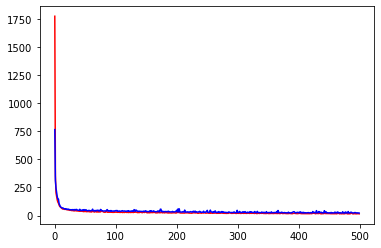

In [33]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], c= 'r')
plt.plot(history.history['val_loss'], c= 'b')